# [Working with NIfTI images](https://neuraldatascience.io/8-mri/nifti.html)

In [37]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import nilearn as nil

In [2]:
data_all =  "../data_small"
img_path = os.path.join(data_all, "data/AOMIC/ds002785/sub-0001/anat/sub-0001_T1w.nii.gz")
#img_path

## Load NIfTI file

In [3]:
img = nib.load(img_path) ## nifti file
type(img)

nibabel.nifti1.Nifti1Image

## View metadata

In [4]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 220   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        1.        1.        1.        0.008227  0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'Piop'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.015384098
quatern_c       : 0.99854666
quatern_d       : 0.049207345
qoffset_x       : 126.21818
qoffse

## Access data in the NIfTI object

In [5]:
img_arr = img.get_fdata()
type(img_arr)

numpy.ndarray

In [6]:
img_arr.shape

(240, 240, 220)

## Visualize a slice

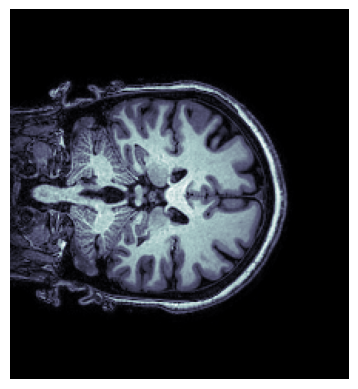

In [36]:
plt.imshow(img_arr[:,100,:], cmap='bone')
plt.axis('off')
plt.show()

<br/>**Rotate:**

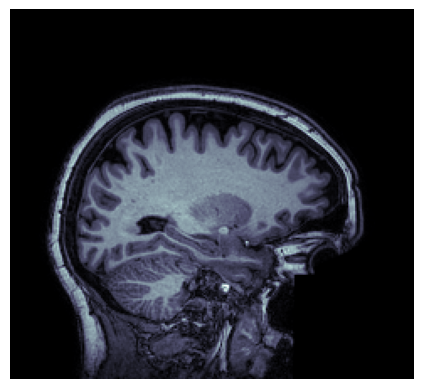

In [8]:
plt.imshow(ndi.rotate(img_arr[96], 90), cmap='bone')
plt.axis('off')
plt.show()

## Plot a series of slices

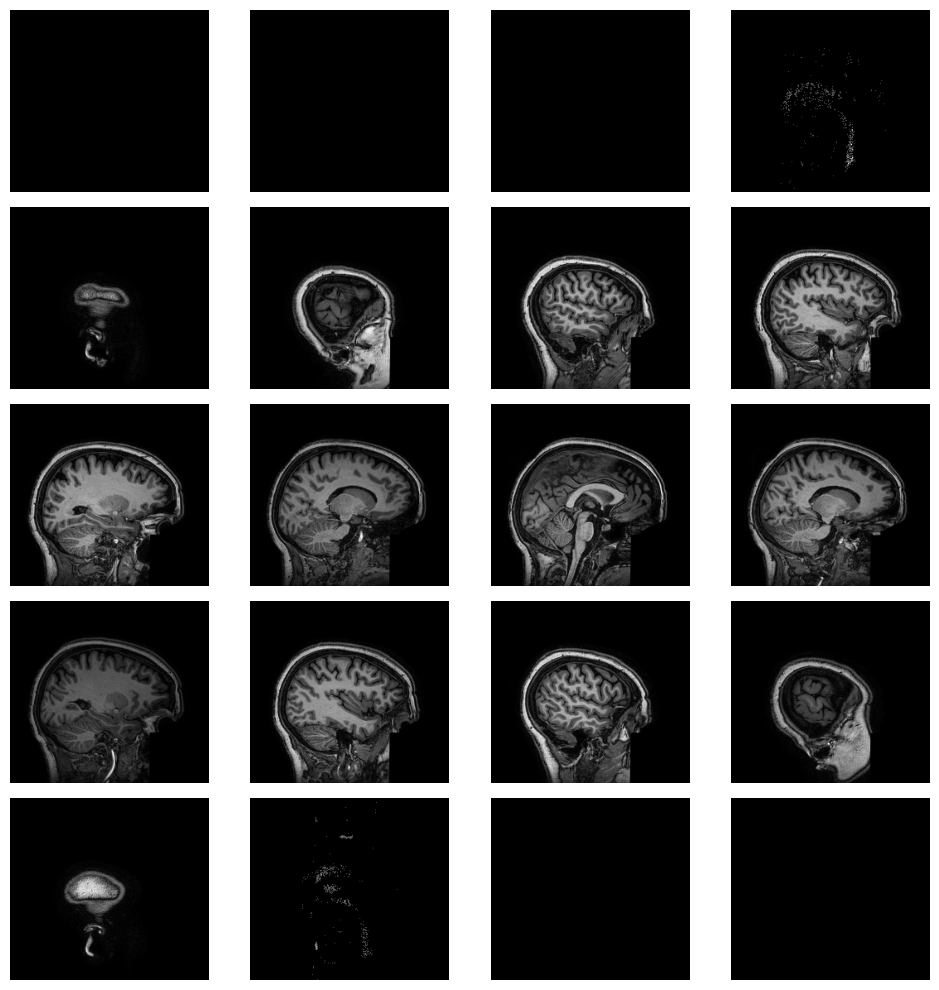

In [35]:
dim = 0 ## specify which dim to slice 0/1/2

fig_rows = 5
fig_cols = 4
n_subplots = fig_rows * fig_cols             ## 16
n_slice = img.shape[dim]                     ## 240
step_size = n_slice // n_subplots            ## 15
plot_range = n_subplots * step_size          ## 240
start_stop = int((n_slice - plot_range) / 2) ## 0

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, slices in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(img_arr.take(indices=slices, axis=dim), 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

## Plot with NiLearn
designed to work with neuroimaging data specifically

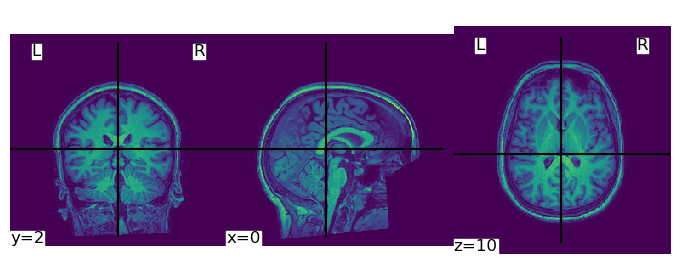

In [39]:
from nilearn import plotting

plotting.plot_img(img)  ## don't need to fetch the ndarray inside
plt.show()

<br/> **`plot_img()` function also provides a variety of ways to display the brain**

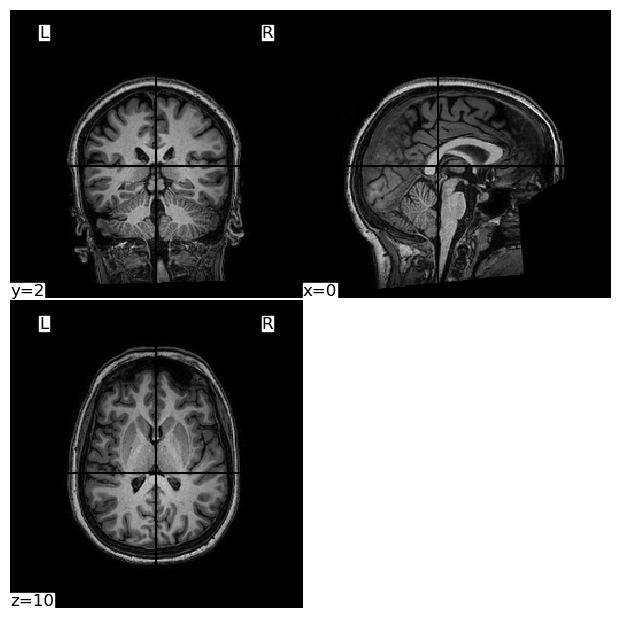

In [74]:
plotting.plot_img(img, display_mode='tiled', cmap='gray')
plt.show()

<br/> **Use the `cut_coords` kwarg to specify there to centre the crosshairs and “cuts” through the image that we visualize**    
The coordinates are relative to the isocentre of the MRI scanner

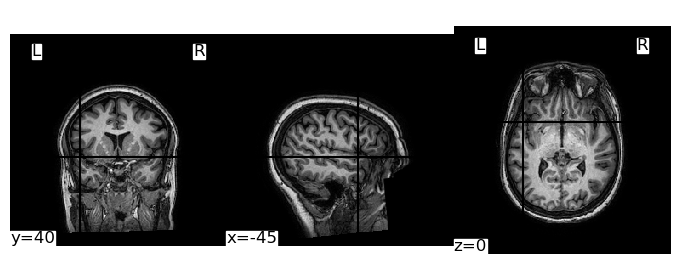

In [44]:
plotting.plot_img(img, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

<br/> **to see multiple slices at once**

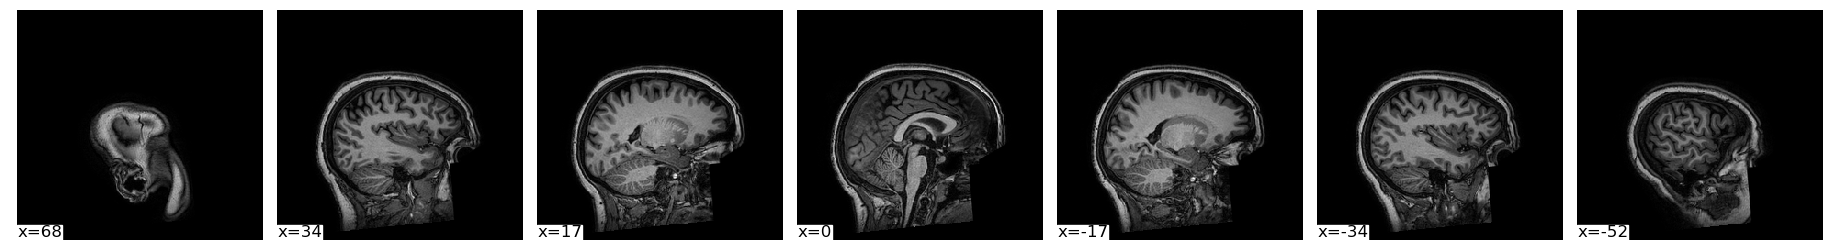

In [49]:
plotting.plot_img(img, display_mode='x', cmap='gray')  ## x/y/z
plt.show()

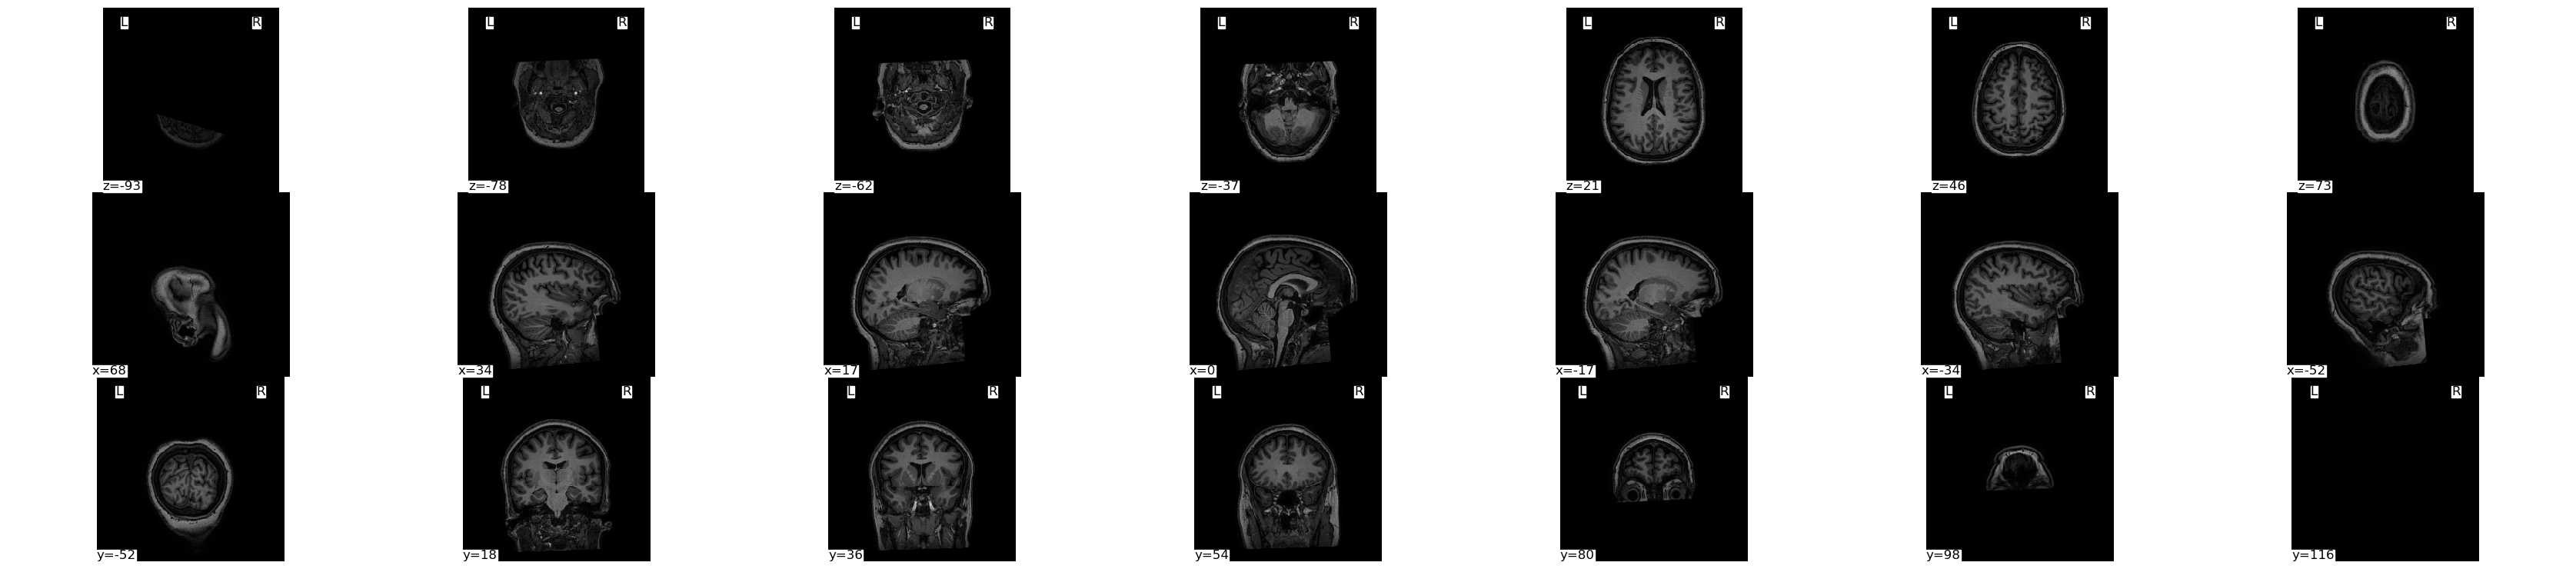

In [51]:
plotting.plot_img(img, display_mode='mosaic', cmap='gray')
plt.show()

## Smoothing

smoothing kernel: full width half-maximum (**FWHM**)

FWHM is the width of the smoothing kernel, in millimetres, at the point in the kernel where it is half of its maximum height.   
Thus a larger FWHM value applies more smoothing.

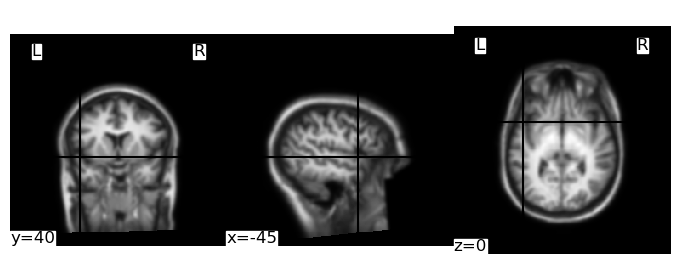

In [54]:
from nilearn import image

fwhm = 4  ## ??

img_smth = image.smooth_img(img, fwhm)
plotting.plot_img(img_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

---

# [Convert array into nifti file using Python](https://pycad.co/how-to-convert-array-into-nifti-python/)

In [63]:
import numpy as np
import nibabel as nib

## Convert from any type to numpy array

In [56]:
normal_array = img_arr

In [64]:
# must specify the data types, any type that suits is fine
converted_array = np.array(normal_array, dtype=np.float32)

## Convert the numpy array into a nifti file
**By `niBabel.Nifty1Image` (or `Nifti2Image`) through an [affine transformation](https://nipy.org/nibabel/image_orientation.html).**

In [67]:
affine = np.eye(4) ## ?? homogeneous affine giving relationship between voxel coordinates and world coordinates.
nifti_file = nib.Nifti1Image(converted_array, affine)

In [72]:
# Here you put the path + the extionsion 'nii' or 'nii.gz'
#path_to_save = "./nifti_converted_test.nii.gz"
#nib.save(nifti_file, path_to_save) 

In [68]:
type(nifti_file)

nibabel.nifti1.Nifti1Image

In [69]:
#print(nifti_file.header)  ## dif from img.header

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 240 240 220   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1

***

# HDF5 format

In [36]:
import os
import h5py
import numpy as np
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt

In [15]:
data_all =  "../data_small"
img_perp_path = os.path.join(data_all, "data/AOMIC/ds002785/sub-0001/anat/sub-0001_T1w_preprocessed.h5")

## Load the data

In [16]:
img_prep = h5py.File(img_perp_path, 'r')

## Inspect keys

In [17]:
#  h5py.File acts like a Python dictionary, thus we can check the keys
list(img_prep.keys())

['preprocessed_volume']

## Extract the value

In [25]:
img_prep_data = img_prep['preprocessed_volume'] ## or: img_prep.get('preprocessed_volume')

In [26]:
print(type(img_prep_data))
print(img_prep_data.shape)

<class 'h5py._hl.dataset.Dataset'>
(160, 192, 160)


In [32]:
img_prep_data[3]

array([[-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       ...,
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448]])

## Turn into numpy array

In [30]:
img_prep_arr = np.array(img_prep_data)

In [31]:
print(type(img_prep_arr))
print(img_prep_arr.shape)

<class 'numpy.ndarray'>
(160, 192, 160)


In [33]:
img_prep_arr[3]

array([[-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       ...,
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448],
       [-0.49228448, -0.49228448, -0.49228448, ..., -0.49228448,
        -0.49228448, -0.49228448]])

## plot the image

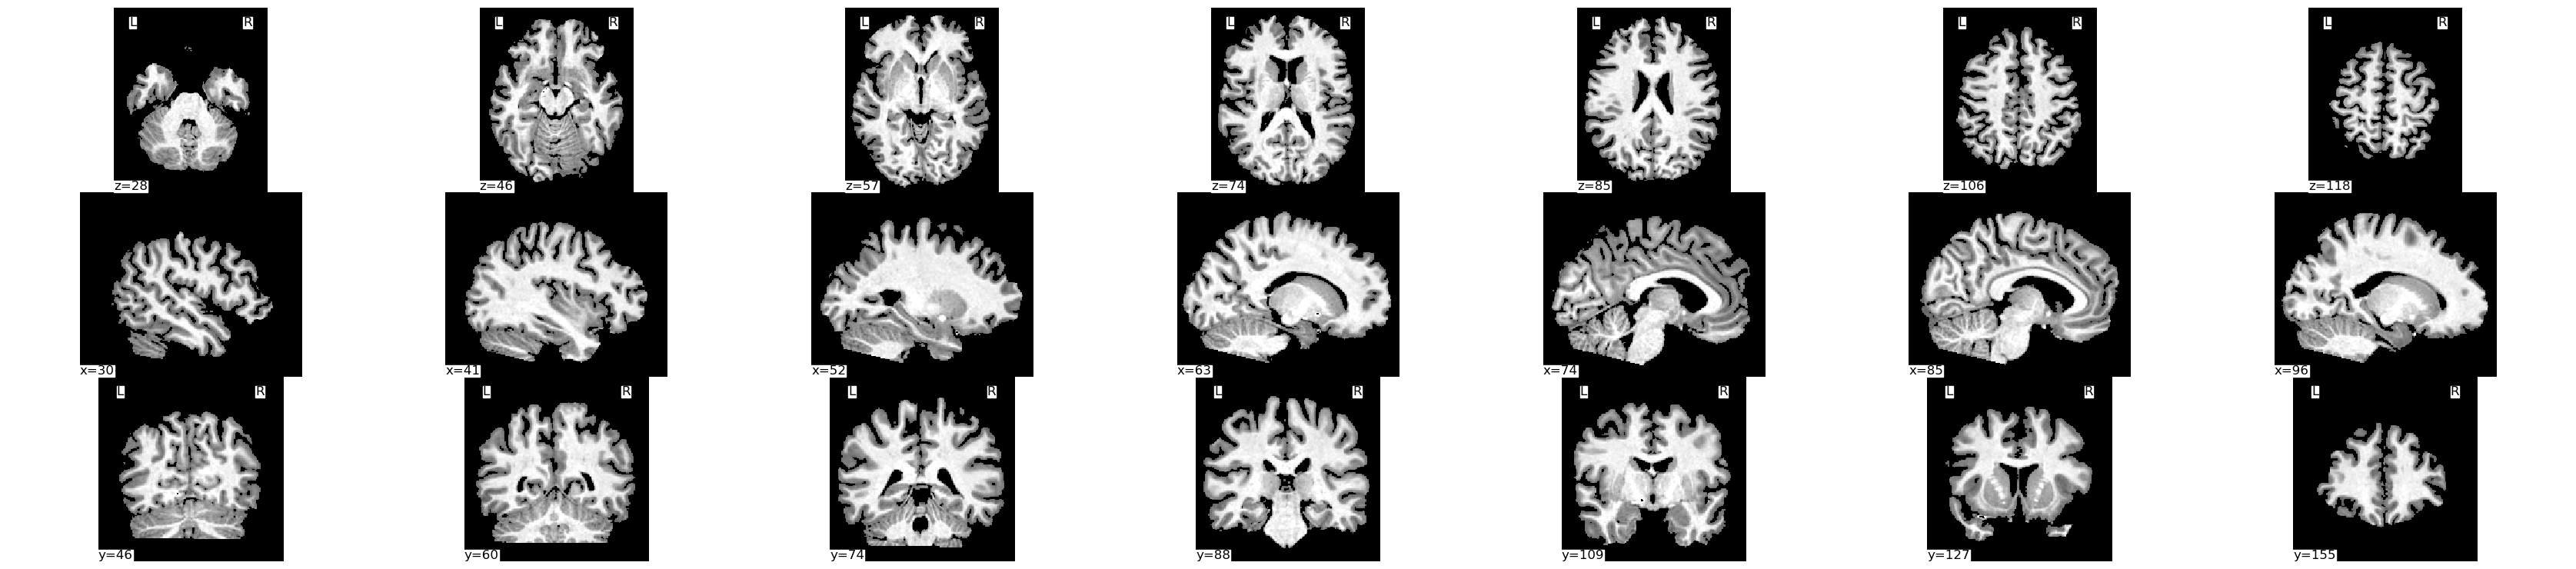

In [39]:
# convert into nifti data (or use matplitlib directly on the np array)
## ?? is the affine still an identity matrix
img_prep_nifti = nib.Nifti1Image(img_prep_arr, affine = np.eye(4))
# use nilearn to plot
plotting.plot_img(img_prep_nifti, display_mode='mosaic', cmap='gray')
plt.show()

In [41]:
print(img_prep_nifti.header)
## ?? where to find the range of the x/y/z axes

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 160 192 160   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1